Discount factors: [0.97609901 0.94557489 0.91132992 0.87414137]
Spot rates: [0.04838251 0.05596219 0.06190019 0.06725658]
Forward rates: [0.06354187 0.07377621 0.08332575]


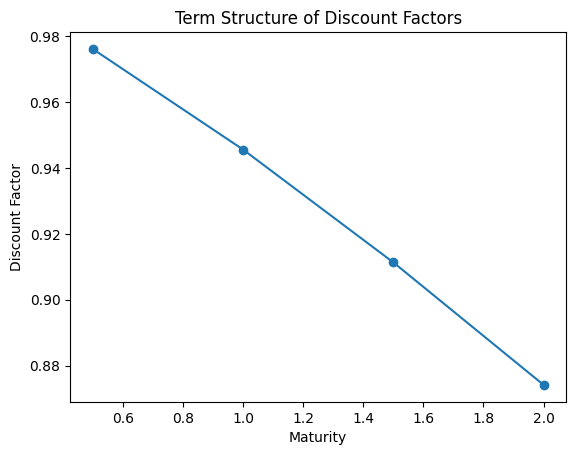

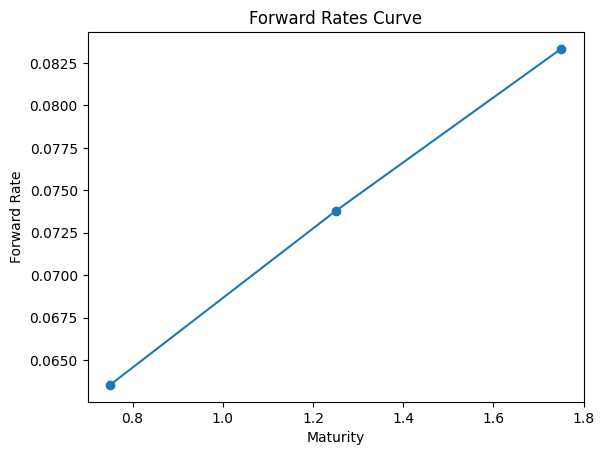

In [ ]:
#Question 1

import numpy as np
import matplotlib.pyplot as plt

#Back substitution Code
def back_substitution(A, y):
  n = len(A)
  x = np.zeros(n)
  for i in range(0, n):
    tmp = y[i]
    for j in range(0, i):
      tmp -= x[j]* A[i, j]
    x[i] = tmp / A[i, i]
  return x

bond_prices = np.array([985.86, 974.40, 967.99, 966.82])
maturity = np.array([0.5, 1.0, 1.5, 2.0])
face_value = np.array([1000, 1000, 1000, 1000])
coupon_rate = np.array([0.02, 0.03, 0.04, 0.05])
coupon = coupon_rate * (face_value/2)

#Part A

def compute_dis_fac(bond_prices, maturity, face_value, coupon):
  N = len(bond_prices)
  A = np.zeros((N, N))
  y = bond_prices

  for i in range(N):
    num_payments = int(maturity[i] * 2)
    for j in range(num_payments):
      A[i, j] = coupon[i]
    A[i, num_payments - 1] += face_value[i]
  return back_substitution(A, y)

def compute_spot_fac(discount_factors):
  N = len(discount_factors)
  time_periods = np.linspace(0.5, 0.5 * N, N)
  spot_rates = []
  spot_rates = np.array(-np.log(discount_factors) / time_periods)
  return np.array(spot_rates)

#Part B

def compute_for_rat(discount_factors):
  N = len(discount_factors)
  time_periods = np.linspace(0.5, 0.5 * N, N)
  forward_rates = []

  for m in range(N-1):
    Z_1 = discount_factors[m] #discount at Time 1
    Z_2 = discount_factors[m + 1] #discount at Time 2
    time1 = time_periods[m]
    time2 = time_periods[m + 1]

    fwd_rate = (-np.log(Z_2 / Z_1)) / (time2 - time1)
    forward_rates.append(fwd_rate)
  return np.array(forward_rates)

#Part C
discount_factors = compute_dis_fac(bond_prices, maturity, face_value, coupon)
print(f"Discount factors:", discount_factors)

spot_rates = compute_spot_fac(discount_factors)
print(f"Spot rates:", spot_rates)

forward_rates = compute_for_rat(discount_factors)
print(f"Forward rates:", forward_rates)

#Part D
plt.plot(maturity, discount_factors, marker='o', label= 'Discount Factors (Term Structure)')
plt.xlabel("Maturity")
plt.ylabel("Discount Factor")
plt.title("Term Structure of Discount Factors")
plt.show()

forward_rates = compute_for_rat(discount_factors)
forward_maturity = []
for i in range(len(maturity) - 1) :
  maturity_mid = ((maturity[i] + maturity[i+1]) / 2)
  forward_maturity.append(maturity_mid)
forward_maturity = np.array(forward_maturity)

plt.plot(forward_maturity, forward_rates, marker='o', label='Forward Rates')
plt.xlabel("Maturity")
plt.ylabel("Forward Rate")
plt.title("Forward Rates Curve")
plt.show()








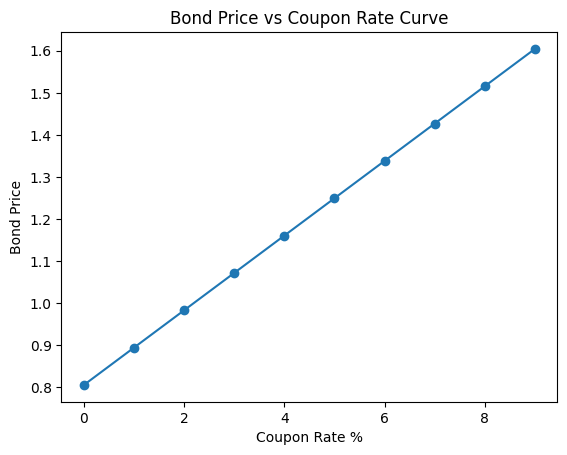

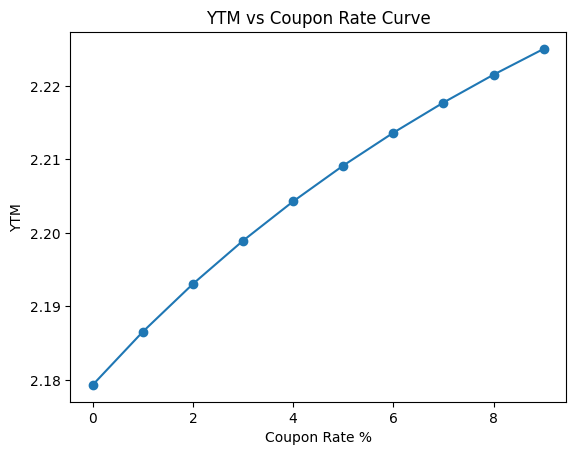

In [14]:
#Question 2

#There must be something wrong with how I am computing bond prices since
#I dont think my graphs are reasonable

import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt

## From Mastering Python in Finance (with typo corrections by FF)

def bond_ytm(price, FaceVal, T, coup, freq=2, guess=0.05):
  freq = float(freq)
  periods = T*freq
  coupon = coup / 100. * FaceVal/freq
  dt= [(i+1)/freq for i in range(int(periods))]
  ytm_func= lambda y: sum([coupon/(1+y/freq)**(freq*t) for t in dt]) + FaceVal/(1+y/freq)**periods-price
  return optimize.newton(ytm_func, guess)

#Parameters
beta_0 = 0.02
beta_1 = 0.02
beta_2 = 0.20
tau = 5
N = 10

def nelson_siegel(tau, T, beta_0, beta_1, beta_2):
  return beta_0 + (beta_1 * beta_2)*(tau/T)*(1-np.exp(-(T/tau)) - beta_2*(np.exp(-(T/tau))))

T_values = np.linspace(1, N, N)
r_1 = np.array([nelson_siegel(tau, T, beta_0, beta_1, beta_2) for T in T_values])

coupon_rates = np.linspace(0, 0.09, 10)
face_value = 1.0

def compute_bond_prices(coupon_rate, face_value, r_1, T_values):
  coupon = coupon_rate * face_value
  bond_price = 0

  for i, T in enumerate(T_values): #Help from ChatGPT for this loop
    if i < len(T_values) - 1 :
      cash_flow = coupon
    else :
      cash_flow = face_value + coupon

    discount_factor = np.exp(-r_1[i] * T)
    bond_price += cash_flow * discount_factor
  return bond_price

bond_prices = []
ytms = []

for coupon_rate in coupon_rates:
  bond_price = compute_bond_prices(coupon_rate, face_value, r_1, T_values)
  bond_prices.append(bond_price)

  ytm = bond_ytm(bond_price, face_value, N, coupon_rate * 100)
  ytms.append(ytm)

ytms = np.array(ytms)

#Plot Curves

#Bond Price vs Coupon Rate
plt.plot(coupon_rates * 100, bond_prices, marker='o', label='Bond Price')
plt.xlabel("Coupon Rate %")
plt.ylabel("Bond Price")
plt.title("Bond Price vs Coupon Rate Curve")
plt.show()

#YTM vs Coupon Rate
plt.plot(coupon_rates * 100, ytms * 100, marker='o', label='YTM')
plt.xlabel("Coupon Rate %")
plt.ylabel("YTM")
plt.title("YTM vs Coupon Rate Curve")
plt.show()






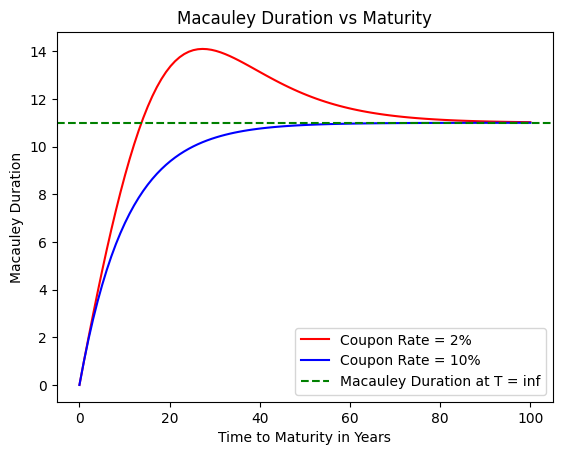

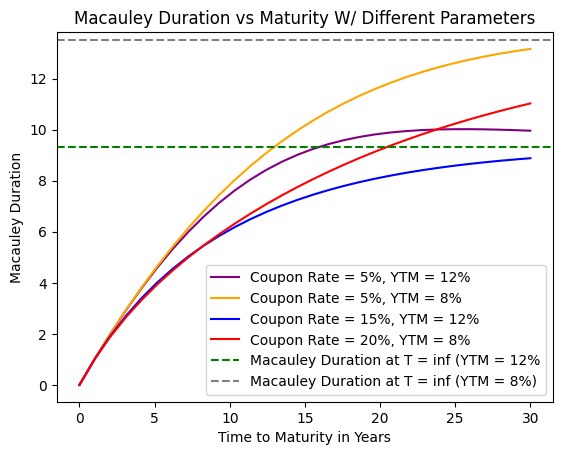

In [12]:
#Question 4

import numpy as np
import matplotlib.pyplot as plt

#Part A
def compute_dmac(ytm, coupon_rate, T):
  d_mac = 1 + (1/ytm) + (T * (ytm - coupon_rate) - (1 + ytm)) /(coupon_rate*(pow(1 + ytm, T) - 1) + ytm)
  return d_mac

#Part B
ytm = 0.1
T = np.linspace(0, 100, 100)
coupon_rate1 = 0.02
coupon_rate2 = 0.1

d_mac1 = compute_dmac(ytm, coupon_rate1, T)
d_mac2 = compute_dmac(ytm, coupon_rate2, T)
asymptote = 1 + (1 / ytm)

plt.plot(T, d_mac1, label='Coupon Rate = 2%', color = 'red')
plt.plot(T, d_mac2, label='Coupon Rate = 10%', color = 'blue')
plt.axhline(y=asymptote, color='green', linestyle='--', label=f'Macauley Duration at T = inf')
plt.xlabel("Time to Maturity in Years")
plt.ylabel("Macauley Duration")
plt.title("Macauley Duration vs Maturity")
plt.legend()
plt.show()

#Part C
ytm2 = 0.12
ytm3 = 0.08
T2 = np.linspace (0, 30, 30)
coupon_rate3 = 0.05
coupon_rate4 = 0.15
coupon_rate5 = 0.20

d_mac3 = compute_dmac(ytm2, coupon_rate3, T2)
d_mac4 = compute_dmac(ytm3, coupon_rate3, T2)
d_mac5 = compute_dmac(ytm2, coupon_rate4, T2)
d_mac6 = compute_dmac(ytm, coupon_rate5, T2)
d_mac6 = compute_dmac(ytm3, coupon_rate5, T2)

asymptote1 = 1 + (1 / ytm)
asymptote2 = 1 + (1 / ytm2)
asymptote3 = 1 + (1 / ytm3)

plt.plot(T2, d_mac3, label='Coupon Rate = 5%, YTM = 12%', color='purple')
plt.plot(T2, d_mac4, label='Coupon Rate = 5%, YTM = 8%', color='orange')
plt.plot(T2, d_mac5, label='Coupon Rate = 15%, YTM = 12%', color='blue')
plt.plot(T2, d_mac6, label='Coupon Rate = 20%, YTM = 8%', color='red')
plt.axhline(y=asymptote2, color='green', linestyle='--', label=f'Macauley Duration at T = inf (YTM = 12%')
plt.axhline(y=asymptote3, color='gray', linestyle='--', label=f'Macauley Duration at T = inf (YTM = 8%)' )

plt.xlabel("Time to Maturity in Years")
plt.ylabel("Macauley Duration")
plt.title("Macauley Duration vs Maturity W/ Different Parameters")
plt.legend()
plt.show()

In [13]:
#Question 5

#Part A

#Company A should borrow at LIBOR and pay 8.3% to the Bank
#Company A net = -LIBOR - 8.3% + LIBOR = -8.3% Fixed Rate Loan which is better than original -8.8% Loan

#Company B should borrow at 8% and pay LIBOR + 0.3%
#Company B net = -8% - (LIBOR + 0.3%) + 8.3% = -LIBOR Floating Rate Loan which is what Company B intended to have

#Bank recieves (8.8% - 8.0% - 2*(0.3%)) = 0.2%

#Part B

#In this scenario, Company A would already have a better lower fixed rate than any possible swap (where the Bank and Company B still are satisfied)
#Company B, which prefers floating rate loan in the first place, would not receive any better floating loan than LIBOR even with a swap since at best,
#Company A can only return a floating rate loan priced at LIBOR.
#Ultimately, Company A and B no longer hold any comparative advantage between each other in either department.